In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import random

In [2]:
ads = pd.read_csv('../datasets/multivariate/ads.csv', index_col=['Time'], parse_dates=['Time'])

In [3]:
ads.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [4]:
ads.shape

(216, 1)

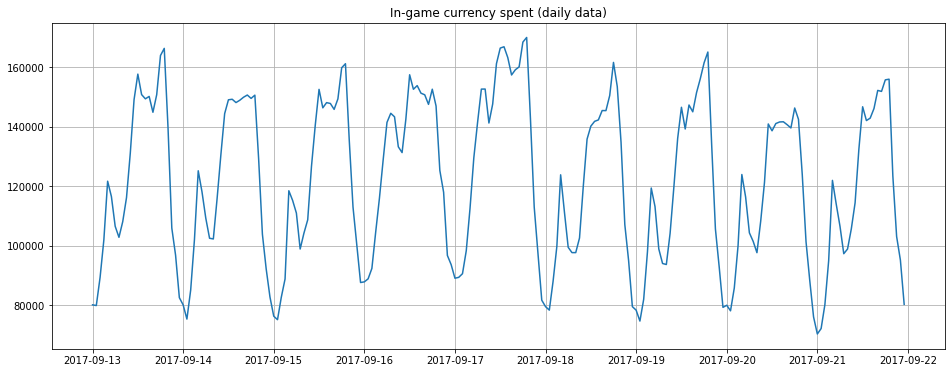

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(ads)
plt.title('In-game currency spent (daily data)')
plt.grid(True)
plt.show()

# Feature Engineering


## Date Features

Extract: day, weekdays, isweekend, and lags value

In [6]:
ads_features = ads.copy()
ads_features.columns = ['y']

In [7]:
ads_features['hour'] = ads_features.index.hour
ads_features['weekday'] = ads_features.index.weekday
ads_features['is_weekend'] = 0

ads_features.loc[ads_features.weekday >= 5, 'is_weekend'] = 1

In [8]:
ads_features.head(8)

,y,hour,weekday,is_weekend
Time,,,,
2017-09-13 00:00:00,80115,0,2,0
2017-09-13 01:00:00,79885,1,2,0
2017-09-13 02:00:00,89325,2,2,0
2017-09-13 03:00:00,101930,3,2,0
2017-09-13 04:00:00,121630,4,2,0
2017-09-13 05:00:00,116475,5,2,0
2017-09-13 06:00:00,106495,6,2,0
2017-09-13 07:00:00,102795,7,2,0


## Target Encoding

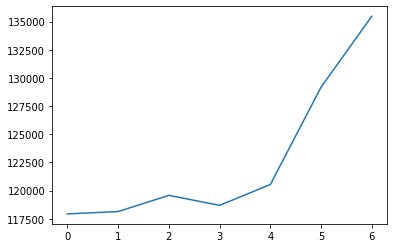

In [9]:
weekday_mean = ads_features.groupby('weekday')['y'].mean()
plt.plot(weekday_mean)

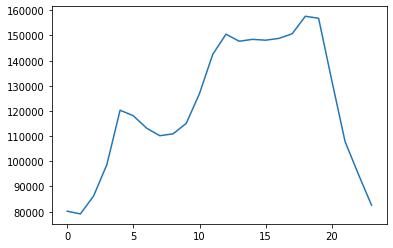

In [10]:
hour_mean = ads_features.groupby('hour')['y'].mean()
plt.plot(hour_mean)

In [11]:
ads_features['weekday_mean'] = ads_features['weekday'].map(lambda x: dict(weekday_mean)[x])
ads_features['hour_mean'] = ads_features['hour'].map(lambda x: dict(hour_mean)[x])

In [12]:
ads_features.head()

,y,hour,weekday,is_weekend,weekday_mean,hour_mean
Time,,,,,,
2017-09-13 00:00:00,80115,0,2,0,119575.416667,80178.888889
2017-09-13 01:00:00,79885,1,2,0,119575.416667,79091.111111
2017-09-13 02:00:00,89325,2,2,0,119575.416667,86223.333333
2017-09-13 03:00:00,101930,3,2,0,119575.416667,98695.000000
2017-09-13 04:00:00,121630,4,2,0,119575.416667,120291.111111


## Onehot Encoded Features

In [13]:
weekday_onehot = pd.get_dummies(ads_features['weekday'], prefix='weekday')
ads_features = pd.concat([ads_features, weekday_onehot], axis=1)

In [14]:
ads_features.head()

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
Time,,,,,,,,,,,,,
2017-09-13 00:00:00,80115,0,2,0,119575.416667,80178.888889,0,0,1,0,0,0,0
2017-09-13 01:00:00,79885,1,2,0,119575.416667,79091.111111,0,0,1,0,0,0,0
2017-09-13 02:00:00,89325,2,2,0,119575.416667,86223.333333,0,0,1,0,0,0,0
2017-09-13 03:00:00,101930,3,2,0,119575.416667,98695.000000,0,0,1,0,0,0,0
2017-09-13 04:00:00,121630,4,2,0,119575.416667,120291.111111,0,0,1,0,0,0,0


## Lag Features

In [15]:
# Create lags features
for i in range(1, 24):
    ads_features["lag_{}".format(i)] = ads_features.y.shift(i)
ads_features.head(5)

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-13 00:00:00,80115,0,2,0,119575.416667,80178.888889,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 01:00:00,79885,1,2,0,119575.416667,79091.111111,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 02:00:00,89325,2,2,0,119575.416667,86223.333333,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 03:00:00,101930,3,2,0,119575.416667,98695.000000,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 04:00:00,121630,4,2,0,119575.416667,120291.111111,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ads_features = ads_features.dropna()
ads_features.head()

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-13 23:00:00,82520,23,2,0,119575.416667,82589.444444,0,0,1,0,...,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0,79885.0,80115.0
2017-09-14 00:00:00,80125,0,3,0,118687.291667,80178.888889,0,0,0,1,...,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0,79885.0
2017-09-14 01:00:00,75335,1,3,0,118687.291667,79091.111111,0,0,0,1,...,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0
2017-09-14 02:00:00,85105,2,3,0,118687.291667,86223.333333,0,0,0,1,...,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0
2017-09-14 03:00:00,102080,3,3,0,118687.291667,98695.000000,0,0,0,1,...,150715.0,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0


In [17]:
ads_features.tail()

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-21 19:00:00,155890,19,3,0,118687.291667,156817.222222,0,0,0,1,...,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0,101360.0,123945.0
2017-09-21 20:00:00,123395,20,3,0,118687.291667,132030.555556,0,0,0,1,...,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0,101360.0
2017-09-21 21:00:00,103080,21,3,0,118687.291667,107847.222222,0,0,0,1,...,97290.0,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0
2017-09-21 22:00:00,95155,22,3,0,118687.291667,94936.111111,0,0,0,1,...,98860.0,97290.0,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0
2017-09-21 23:00:00,80285,23,3,0,118687.291667,82589.444444,0,0,0,1,...,105635.0,98860.0,97290.0,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0


In [18]:
ads_features.tail(25)

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-20 23:00:00,76050,23,2,0,119575.416667,82589.444444,0,0,1,0,...,108265.0,97635.0,101440.0,104290.0,116335.0,123880.0,100010.0,85785.0,78110.0,79980.0
2017-09-21 00:00:00,70335,0,3,0,118687.291667,80178.888889,0,0,0,1,...,121250.0,108265.0,97635.0,101440.0,104290.0,116335.0,123880.0,100010.0,85785.0,78110.0
2017-09-21 01:00:00,72150,1,3,0,118687.291667,79091.111111,0,0,0,1,...,140850.0,121250.0,108265.0,97635.0,101440.0,104290.0,116335.0,123880.0,100010.0,85785.0
2017-09-21 02:00:00,80195,2,3,0,118687.291667,86223.333333,0,0,0,1,...,138555.0,140850.0,121250.0,108265.0,97635.0,101440.0,104290.0,116335.0,123880.0,100010.0
2017-09-21 03:00:00,94945,3,3,0,118687.291667,98695.000000,0,0,0,1,...,140990.0,138555.0,140850.0,121250.0,108265.0,97635.0,101440.0,104290.0,116335.0,123880.0
2017-09-21 04:00:00,121910,4,3,0,118687.291667,120291.111111,0,0,0,1,...,141525.0,140990.0,138555.0,140850.0,121250.0,108265.0,97635.0,101440.0,104290.0,116335.0
2017-09-21 05:00:00,113950,5,3,0,118687.291667,118093.333333,0,0,0,1,...,141590.0,141525.0,140990.0,138555.0,140850.0,121250.0,108265.0,97635.0,101440.0,104290.0
2017-09-21 06:00:00,106495,6,3,0,118687.291667,113172.777778,0,0,0,1,...,140610.0,141590.0,141525.0,140990.0,138555.0,140850.0,121250.0,108265.0,97635.0,101440.0
2017-09-21 07:00:00,97290,7,3,0,118687.291667,110168.333333,0,0,0,1,...,139515.0,140610.0,141590.0,141525.0,140990.0,138555.0,140850.0,121250.0,108265.0,97635.0


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def timeseries_train_test_split(X, y, test_size):
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
datasets = {}
datasets['t'] = ads_features

for i in range(23):
    step = i+1
    
    temp_dataset = ads_features.copy()
    temp_dataset['y'] = temp_dataset['y'].shift(-step)
    datasets['t+'+str(step)] =  temp_dataset

In [21]:
datasets.keys()

dict_keys(['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8', 't+9', 't+10', 't+11', 't+12', 't+13', 't+14', 't+15', 't+16', 't+17', 't+18', 't+19', 't+20', 't+21', 't+22', 't+23'])

In [27]:
models = []
errors = []

for i in datasets:
    current_dataset = datasets[i].dropna()
    
    y = current_dataset['y']
    X = current_dataset.drop(['y'], axis=1)

    # reserve 20% of data for testing
    train_X, test_X, train_y, test_y = timeseries_train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler().fit(train_X)
    train_X_scaled = scaler.transform(train_X)
    test_X_scaled = scaler.transform(test_X)

    lr = LinearRegression()
    lr.fit(train_X_scaled, train_y)
    
    predictions = lr.predict(test_X_scaled)
    
    error = mean_absolute_percentage_error(predictions, test_y.values)
    
    errors.append(error)
    models.append(lr)
    
    print('training '+i+', error: {}'.format(error))
    
print('average error {}'.format(np.mean(errors)))

training t, error: 4.142151621445335
training t+1, error: 6.416920154583053
training t+2, error: 6.804831269774102
training t+3, error: 7.603379490529595
training t+4, error: 7.664252279490002
training t+5, error: 8.48544393134603
training t+6, error: 8.867255075699509
training t+7, error: 8.832179975135835
training t+8, error: 7.3343100066869935
training t+9, error: 6.270729990702178
training t+10, error: 7.108794744971525
training t+11, error: 8.099445482494245
training t+12, error: 6.297366016888027
training t+13, error: 3.9422404957995414
training t+14, error: 6.405548681022463
training t+15, error: 4.824587238672271
training t+16, error: 5.274121508498313
training t+17, error: 6.826628464412907
training t+18, error: 5.884329189640617
training t+19, error: 9.189352652903548
training t+20, error: 12.92937512236998
training t+21, error: 9.554337895883695
training t+22, error: 7.398502533690418
training t+23, error: 5.107721201028924
average error 7.135991875986213


In [28]:
valid_sample = ads_features.loc['2017-09-21 00:00:00'] # predict 2017-09-21
valid_sample = valid_sample.drop('y')

scaled_valid_sample = scaler.transform(valid_sample.values.reshape(1, -1))

scaled_valid_sample

array([[-1.61097872, -0.14345226, -0.73854895, -0.73505255, -1.60342578,
        -0.46291005, -0.3520894 , -0.0860663 ,  2.1602469 , -0.46291005,
        -0.46291005, -0.46291005, -1.69564406, -1.24330587, -0.75983475,
         0.05918587,  0.71300525,  0.83555191,  0.58219131,  0.60727704,
         0.62921033,  0.61521022,  0.58291624,  0.4826772 ,  0.556786  ,
        -0.16415906, -0.65316218, -1.06055954, -0.92481637, -0.82215627,
        -0.36838081, -0.07216392, -0.94556038, -1.44814201, -1.70226073]])

In [29]:
prediction_steps=[]

for model in models:
    prediction_steps.append(model.predict(scaled_valid_sample)[0])

In [30]:
models[2].predict(scaled_valid_sample)

array([93747.97155767])

In [31]:
prediction_steps

[78877.39578279514,
 84078.39214329573,
 93747.97155766949,
 111389.45835446818,
 128591.10019713565,
 124029.54306764556,
 116161.92922814205,
 110375.14772484853,
 109428.89410506727,
 115073.06070316388,
 127784.9120248948,
 142138.36533750503,
 143492.34298291523,
 142678.91827634425,
 144295.46174075722,
 144936.14326829166,
 142466.11785648257,
 141743.7718043176,
 142331.47097095137,
 137812.17224872264,
 119986.6645156413,
 103011.63649222838,
 84335.96450763792,
 77130.24816137871]

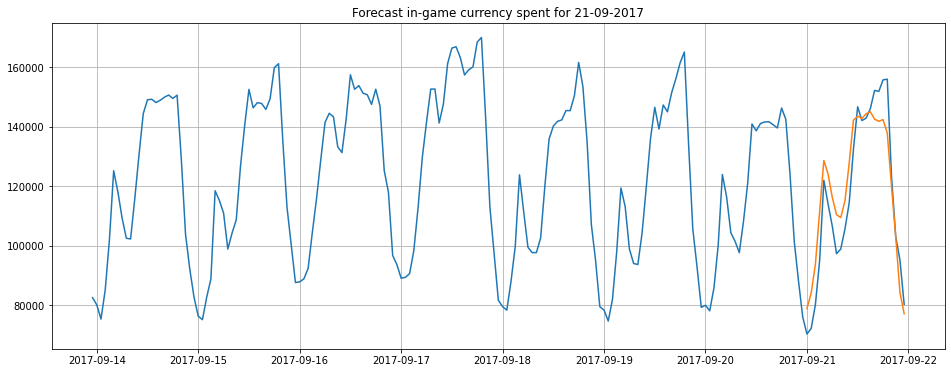

In [34]:
plt.figure(figsize=(16, 6))
plt.plot(ads_features['y'])
plt.plot(pd.Series(prediction_steps, index=ads_features.loc['2017-09-21 00:00:00':].index))
plt.title('Forecast in-game currency spent for 21-09-2017')
plt.grid(True)
plt.show()